# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data: Wholesale customers data
whole = pd.read_csv('../data/Wholesale customers data.csv')

#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [3]:
whole.info()
whole.Region.value_counts().sort_index()
whole.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Axes: >

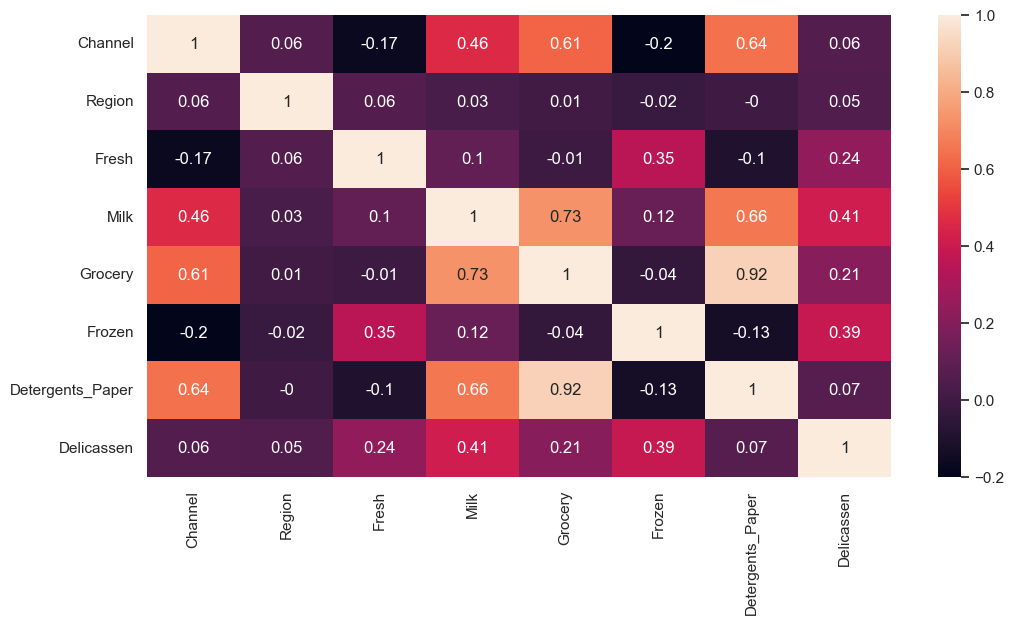

In [4]:
numericals = whole.select_dtypes(np.number)
corr = numericals.corr()
display(corr)
# Create a heatmap to visualize the correlation matrix
sns.set_context("poster") # Set the Seaborn context to "poster" for larger text and figures
sns.set(rc={"figure.figsize": (12., 6.)}) # Set the default figure size for Seaborn plots
sns.set_style("whitegrid") # Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.heatmap(corr.round(2), annot=True)

Text(0.5, 0.98, 'Continuous features')

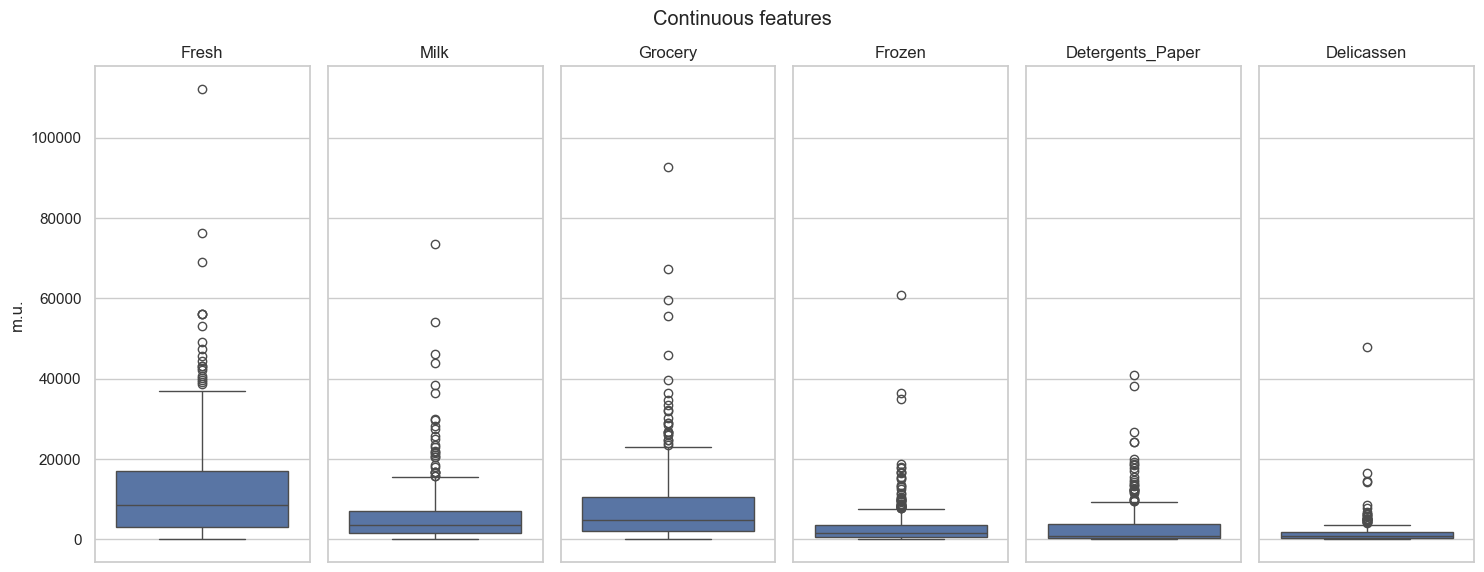

In [5]:
fig, axs = plt.subplots(1, 6, figsize=(15, 6), sharey=True)
sns.boxplot(y='Fresh', data=whole, ax=axs[0])
axs[0].set_title('Fresh')
axs[0].set_ylabel('m.u.')
sns.boxplot(y='Milk', data=whole, ax=axs[1])
axs[1].set_title('Milk')
sns.boxplot(y='Grocery', data=whole, ax=axs[2])
axs[2].set_title('Grocery')
sns.boxplot(y='Frozen', data=whole, ax=axs[3])
axs[3].set_title('Frozen')
sns.boxplot(y='Detergents_Paper', data=whole, ax=axs[4])
axs[4].set_title('Detergents_Paper')
sns.boxplot(y='Delicassen', data=whole, ax=axs[5])
axs[5].set_title('Delicassen')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #rect=[left, bottom, right, top]
fig.suptitle('Continuous features')

**OBSERVACIONES:**

+ Channel: columna categórica con dos valores posibles, Horeca (Hotel/Restaurant/Café) o Retail.
>```terminal
>Channel
>1    298    Horeca
>2    142    Retail
>```
+ Region: columna target/etiqueta, de tipo categórico, con Lisbon, Oporto o Other Region como valores posibles.
>```terminal
>Region
>1     77   Lisbon
>2     47   Oporto
>3    316   Other Region
>```
+ Las demás columnas (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen) son contínuas, de tipo _integer_, y representan el gasto anual en unidades de moneda o _monetary units_ (m.u.).


+ Todos las columnas de valores continuos tienen una gran variabilidad (valor mínimo y máximo muy dispares).

+ Los datos categóricos ya están en formato numérico; no hay que convertirlos.

+ Tampoco faltan datos (no hay valores Null en ninguna columna; todas tienen 440 filas).

+ Parece haber una alta correlación entre Grocery y Detergents_Paper (92%).

+ Todas las características contínuas parecen tener valores atípicos, muy especialmente Fresh, con un valor que supera en más de 4 veces el valor promedio.

+ El gasto en Frozen, Detergents_Paper y Delicassen es notoriamente más bajo que en el resto de productos.


# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [6]:
whole[whole['Fresh']>4*whole['Fresh'].mean()].sort_values(by='Fresh', ascending=False)
# whole[whole['Grocery']>4*whole['Grocery'].mean()].sort_values(by='Grocery', ascending=False)
# whole[whole['Milk']>4*whole['Milk'].mean()].sort_values(by='Milk', ascending=False)
# whole[whole['Frozen']>4*whole['Frozen'].mean()].sort_values(by='Frozen', ascending=False)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
181,1,3,112151,29627,18148,16745,4948,8550
125,1,3,76237,3473,7102,16538,778,918
284,1,3,68951,4411,12609,8692,751,2406
39,1,3,56159,555,902,10002,212,2916
258,1,1,56083,4563,2124,6422,730,3321
103,1,3,56082,3504,8906,18028,1480,2498
259,1,1,53205,4959,7336,3012,967,818
282,1,3,49063,3965,4252,5970,1041,1404


**OBSERVACIONES**

+ Aunque algunos valores de Fresh superan en más de 4 veces el promedio, puesto que esos datos están asociados a Other Regions, es posible que sean acumulados de varias ciudades/regiones y por tanto el dato sea válido. Lo mismo para el valor más atípico de Grocery.

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [7]:
X = whole  # Feature data
#y = None  # Target labels (not used in K-means clustering)

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X) 
customers_scale = transformer.transform(X) 
customers_scale

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

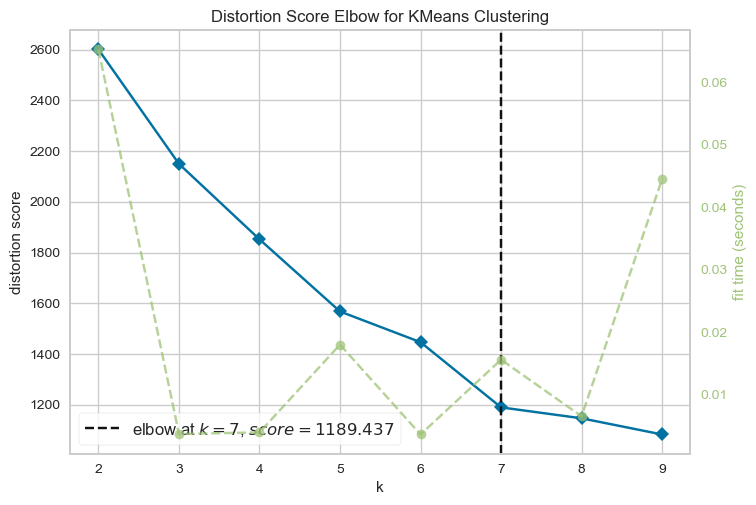

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the KMeans model
# random_state=42 is used for reproducibility of results
km = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the KMeans model
# k=(2,10) indicates the range of number of clusters to try (from 2 to 10)
visualizer = KElbowVisualizer(km, k=(2,10))

# Fit the visualizer to the data
# This will run K-means clustering for each value of k and calculate the distortion score for each
clustering = visualizer.fit(customers_scale)

# Render the plot
# The Elbow plot displays the distortion score for each k
# The point where the distortion score starts to level off ('elbow') is the recommended number of clusters
visualizer.show()

In [9]:
km_labels = pd.Series(clustering.labels_)
print('Número de clusters:', km_labels.nunique())
km_labels.value_counts()

# Conclusión: El código de arriba nos devuelve los datos para el máximo valor de k que el algoritmo debe de haber probado.

Número de clusters: 9


1    179
0     90
5     80
4     36
2     24
8     24
7      4
3      2
6      1
Name: count, dtype: int64

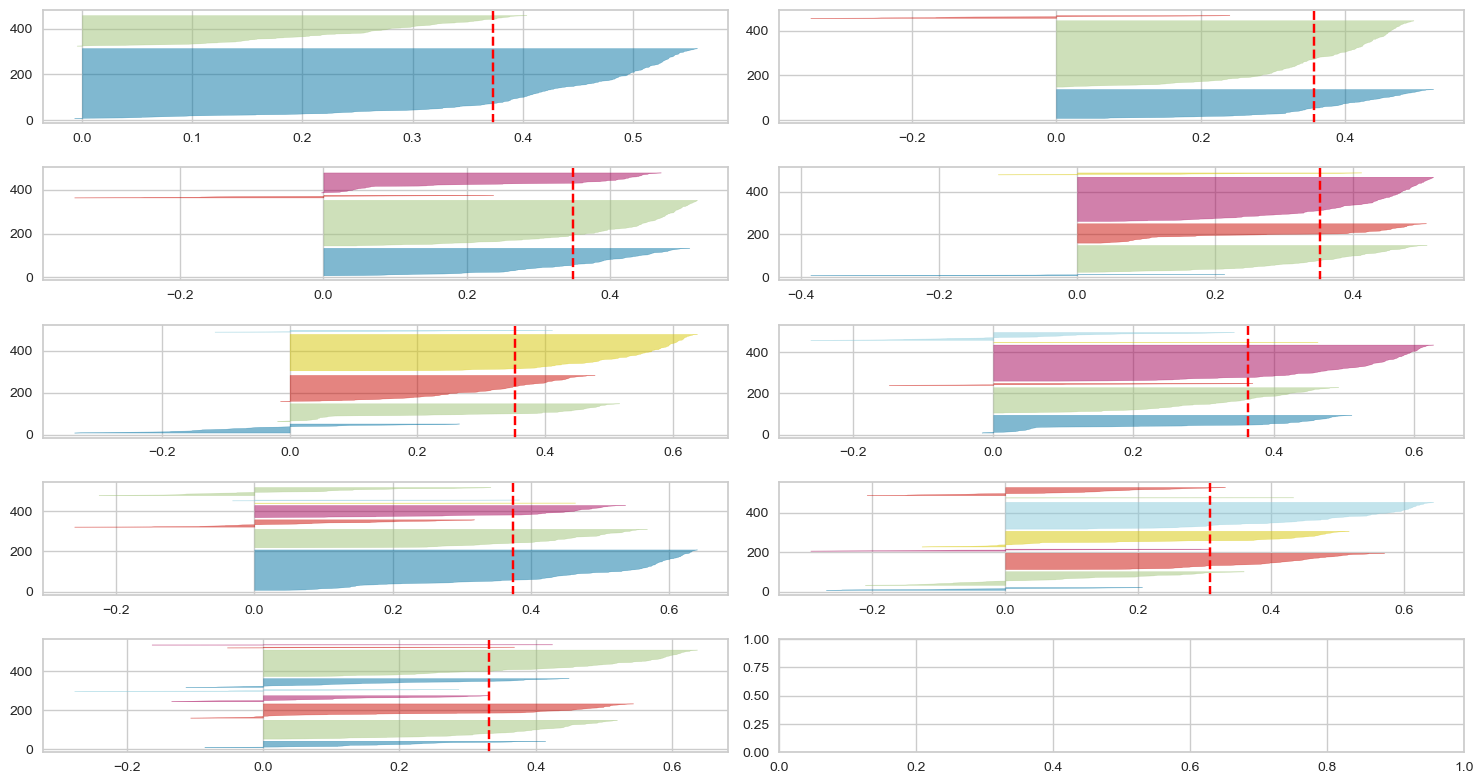

In [10]:
# A ver qué nos da Silhouette
from yellowbrick.cluster import SilhouetteVisualizer

# Setting up the matplotlib figure with multiple subplots
fig, ax = plt.subplots(5, 2, figsize=(15,8))

# Loop through different numbers of clusters (from 2 to 5)
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    # Create KMeans instance for different number of clusters
    # 'k-means++' for smart centroid initialization, 10 different centroid initializations
    # 100 iterations max for each run, and set a random state for reproducibility
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)

    # Determine the position of the subplot
    q, mod = divmod(i, 2)

    # Create a SilhouetteVisualizer with the KMeans instance
    # Colors are set to 'yellowbrick' palette, and the subplot ax is defined
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])

    # Fit the visualizer to the data to produce the silhouette plot
    visualizer.fit(customers_scale)

# Display the plot
plt.tight_layout()
plt.show()

### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [11]:
#Hmmm... En realidad el codo estaba en k = 7.... O como mucho en k = 5.... k = 2 ???
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [12]:
whole['labels'] = clusters
whole

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


Cuenta los valores en `labels`.

In [13]:
print('Valores en labels (literalmente):', len(labels))
print('Valores únicos de cluster:', whole['labels'].nunique())
whole['labels'].value_counts()

Valores en labels (literalmente): 440
Valores únicos de cluster: 2


labels
0    302
1    138
Name: count, dtype: int64

# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [14]:
from sklearn.cluster import DBSCAN 

# Applying DBSCAN
# eps: The maximum distance between two samples for them to be considered as in the same neighborhood
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(customers_scale)

whole['labels_DBSCAN'] = clusters
whole

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,-1
2,2,3,6353,8808,7684,2405,3516,7844,1,-1
3,1,3,13265,1196,4221,6404,507,1788,0,1
4,2,3,22615,5410,7198,3915,1777,5185,1,-1
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0,-1
436,1,3,39228,1431,764,4510,93,2346,0,-1
437,2,3,14531,15488,30243,437,14841,1867,1,-1
438,1,3,10290,1981,2232,1038,168,2125,0,1


Cuenta los valores en `labels_DBSCAN`.

In [15]:
print('Valores en labels (literalmente):', len(clusters))
print('Valores únicos de cluster:', whole['labels_DBSCAN'].nunique())
whole['labels_DBSCAN'].value_counts()

# N.B. -1 in clusters represents outliers detected by DBSCAN !!! 
# Esta etiqueta significa que no encajan bien en ningún cluster basándose en los valores de `eps` y `min_samples`.

Valores en labels (literalmente): 440
Valores únicos de cluster: 9


labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64

# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [16]:
whole.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,-1
2,2,3,6353,8808,7684,2405,3516,7844,1,-1
3,1,3,13265,1196,4221,6404,507,1788,0,1
4,2,3,22615,5410,7198,3915,1777,5185,1,-1


In [17]:
whole_scaled = pd.DataFrame(customers_scale, columns=whole.columns[:-2])
whole_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [18]:
# def plot(x,y,hue):
#     sns.scatterplot(x=x, 
#                     y=y,
#                     hue=hue)
#     plt.title('Detergents Paper vs Milk ')
#     return plt.show();

def plot(x,y,hue,axs,num):
    sns.scatterplot(x=whole_scaled.loc[:, x], 
                    y=whole_scaled.loc[:, y],
                    c=hue, cmap='viridis', marker='o', edgecolor='k', s=50, ax=axs[num])
    axs[num].set_xlabel(x + ' (scaled)')
    axs[num].set_ylabel(y + ' (scaled)')    
    return #plt.show();

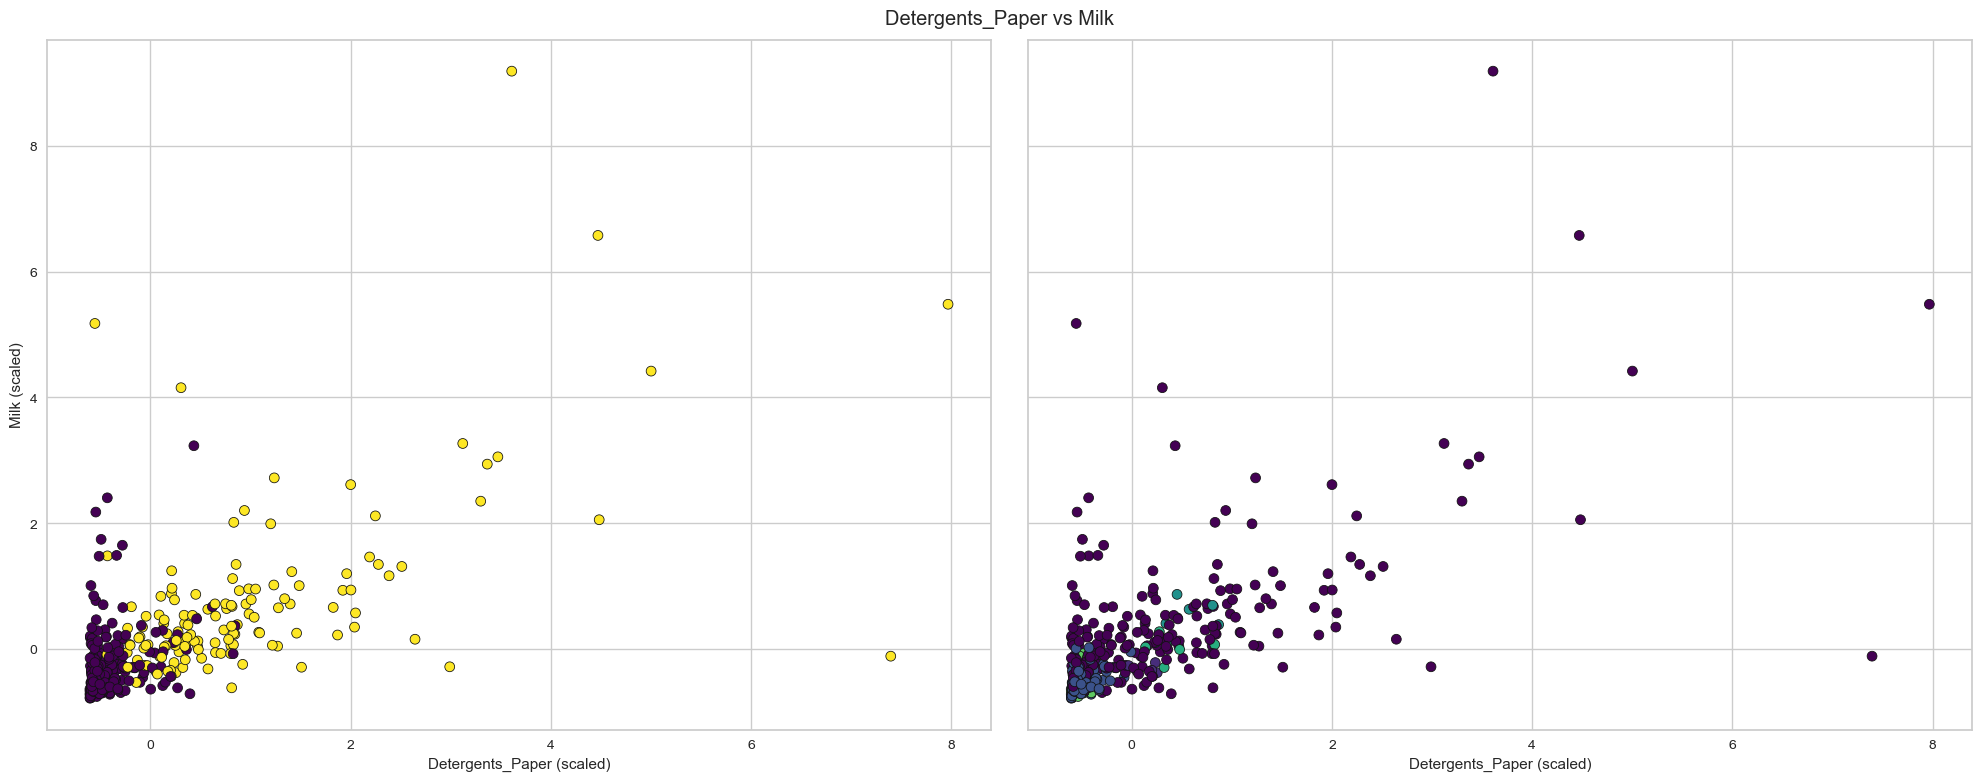

In [19]:
# plt.figure(figsize=(10, 7))
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) #rect=[left, bottom, right, top]

# Método A) Scaled X, como en los apuntes
# plt.scatter(customers_scale[:, 6], customers_scale[:, 3], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)

# Método B) X
# plt.scatter(whole.loc[:, 'Detergents_Paper'], whole.loc[:, 'Milk'], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)

# Método A mejorado) Scaled X using function
#plot('Detergents_Paper', 'Milk', clusters, 'Detergents_Paper vs Milk')

xcol = 'Detergents_Paper'
ycol = 'Milk'
plot(xcol, ycol, labels, axs, 0)  # K-Means
plot(xcol, ycol, clusters, axs, 1)  # DBSCAN
fig.suptitle(xcol + ' vs ' + ycol)
plt.show()

Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

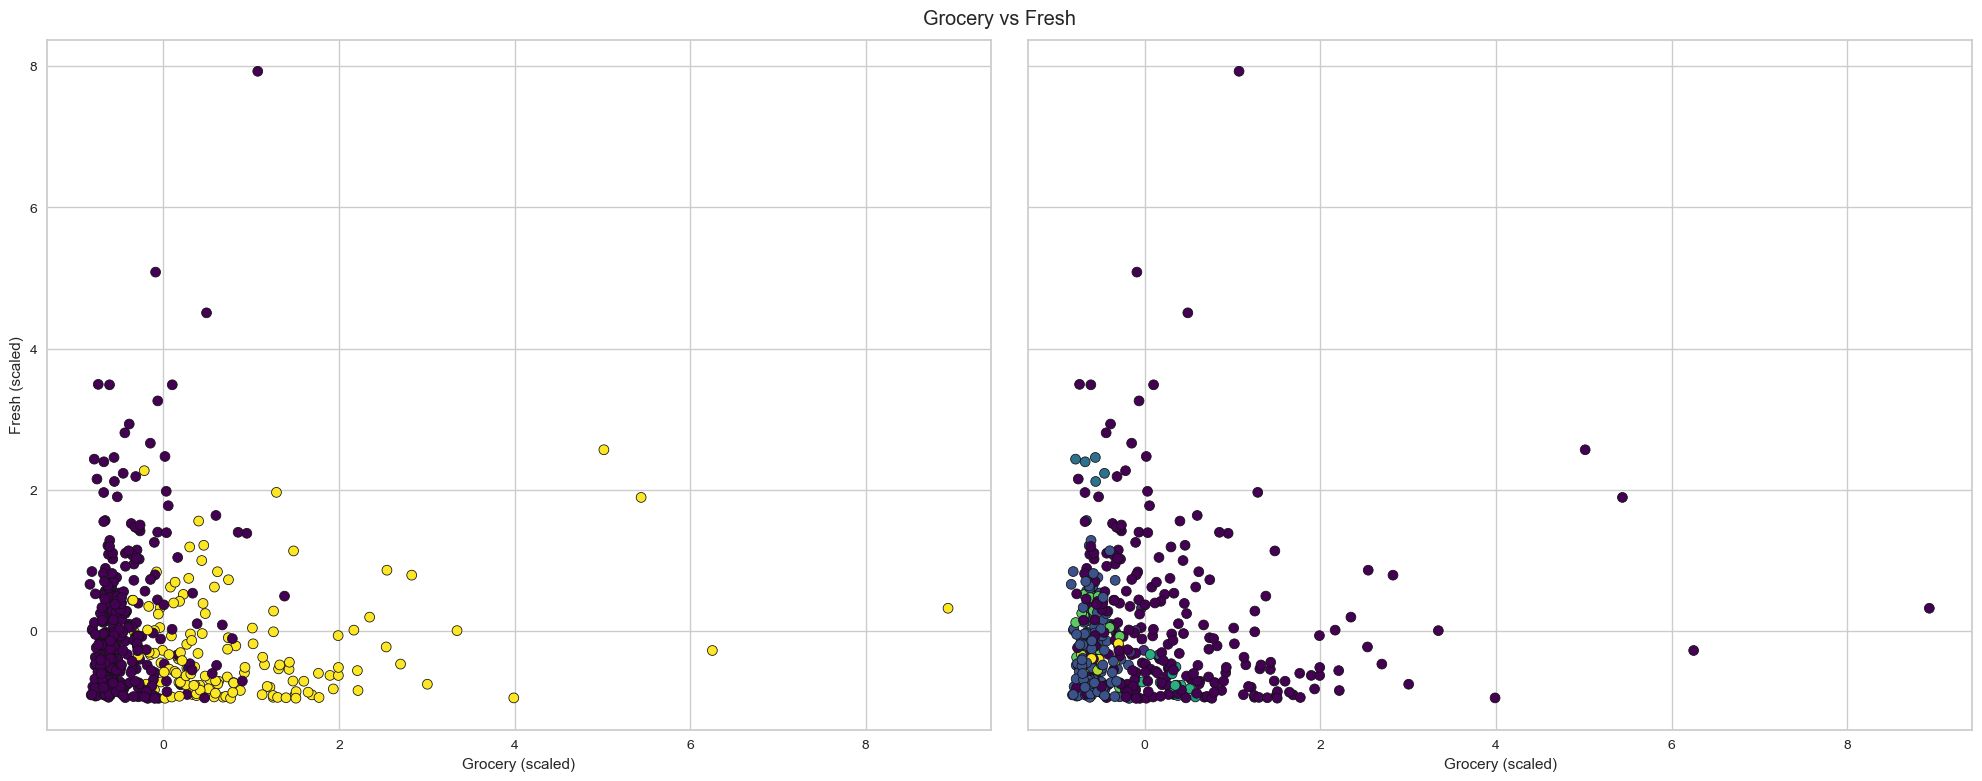

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) #rect=[left, bottom, right, top]
xcol = 'Grocery'
ycol = 'Fresh'
plot(xcol, ycol, labels, axs, 0)  # K-Means
plot(xcol, ycol, clusters, axs, 1)  # DBSCAN
fig.suptitle(xcol + ' vs ' + ycol)
plt.show()

Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

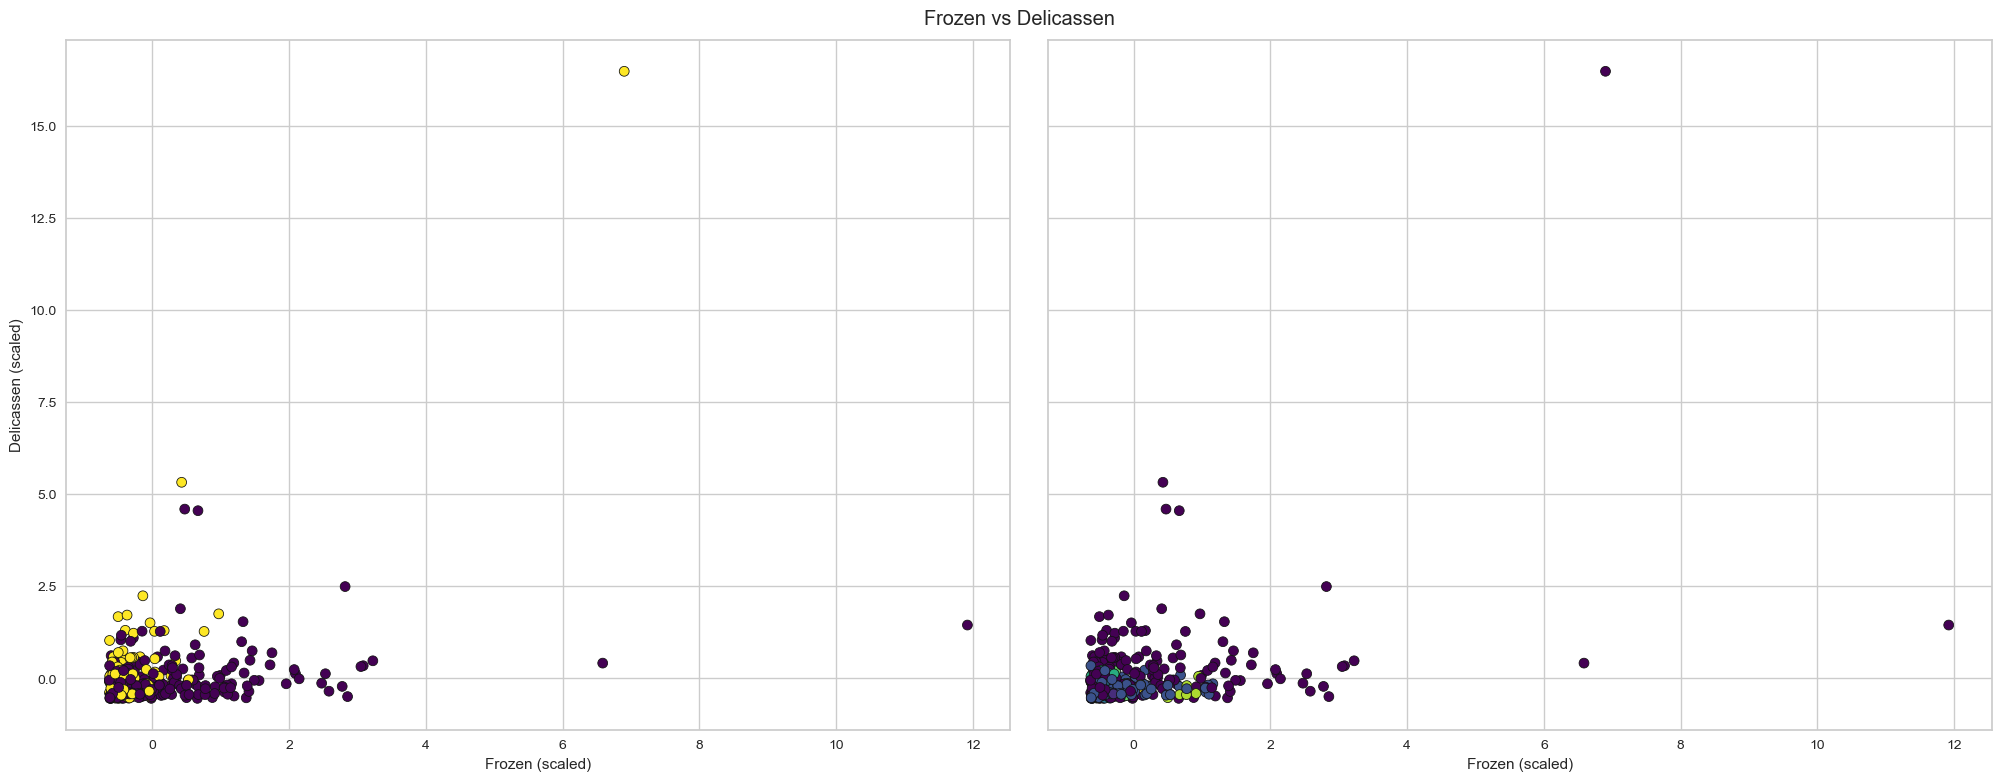

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) #rect=[left, bottom, right, top]
xcol = 'Frozen'
ycol = 'Delicassen'
plot(xcol, ycol, labels, axs, 0)  # K-Means
plot(xcol, ycol, clusters, axs, 1)  # DBSCAN
fig.suptitle(xcol + ' vs ' + ycol)
plt.show()

Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [22]:
print('Valor promedio de todas las columnas:')
whole.describe().iloc[1]

Valor promedio de todas las columnas:


Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
labels                  0.313636
labels_DBSCAN           0.247727
Name: mean, dtype: float64

In [23]:
whole.groupby(['labels']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.016556,2.500000,13451.589404,3308.529801,3919.364238,3671.261589,789.718543,1270.619205,0.619205
1,1.992754,2.637681,8824.282609,11240.442029,16774.739130,1760.355072,7459.144928,2081.275362,-0.565217


In [24]:
whole.groupby(['labels_DBSCAN']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,0.47451
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,1.00000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,0.00000
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,0.00000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,1.00000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,1.00000
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,0.00000
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,0.00000
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,0.00000


¿Qué algoritmo funciona mejor?

**OBSERVACIONES**

En la prueba que se ha realizado (K-Means con n-clusters=2, según ponía el enunciado y el código preexistente), parece que funciona mejor DBSCAN ya que los valores promedios de cada cluster están más cercanos a los valores promedios de las columnas. 

Podríamos probar K-Means con n-clusters=7, que quizá nos daría una clasificación más parecida a la que nos está dando DBSCAN.

Por lo general, K-Means funciona bien con clusters bien definidos y sin mucho ruido (valores atípicos). Y, precisamente, no es el caso ya que los datos presentan bastantes valores atípicos, muy alejados del promedio.

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [25]:
kmeans_7 = KMeans(n_clusters=7).fit(customers_scale)
labels_7 = kmeans_7.predict(customers_scale)
clusters_7 = kmeans_7.labels_.tolist()

whole['labels_k7'] = clusters_7

print('Valores en labels (literalmente):', len(labels_7))
print('Valores únicos de cluster:', whole['labels_k7'].nunique())
whole['labels_k7'].value_counts()

Valores en labels (literalmente): 440
Valores únicos de cluster: 7


labels_k7
1    179
3     86
0     84
2     43
6     36
4     11
5      1
Name: count, dtype: int64

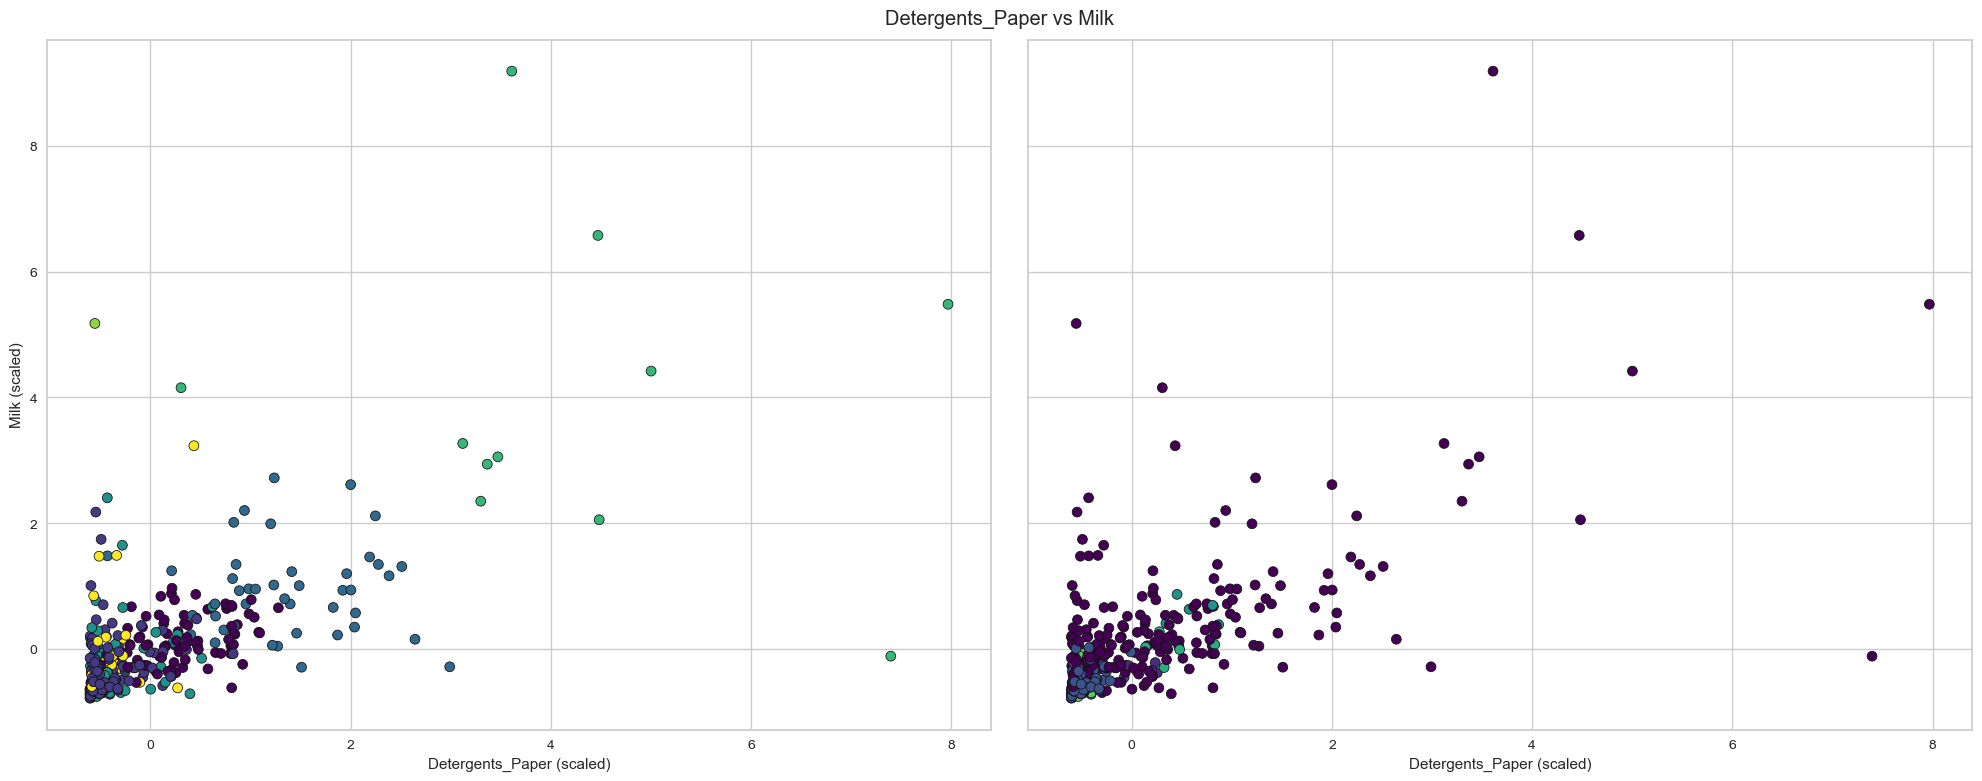

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) #rect=[left, bottom, right, top]

xcol = 'Detergents_Paper'
ycol = 'Milk'
plot(xcol, ycol, labels_7, axs, 0)  # K-Means n-clusters=7
plot(xcol, ycol, clusters, axs, 1)  # DBSCAN
fig.suptitle(xcol + ' vs ' + ycol)
plt.show()

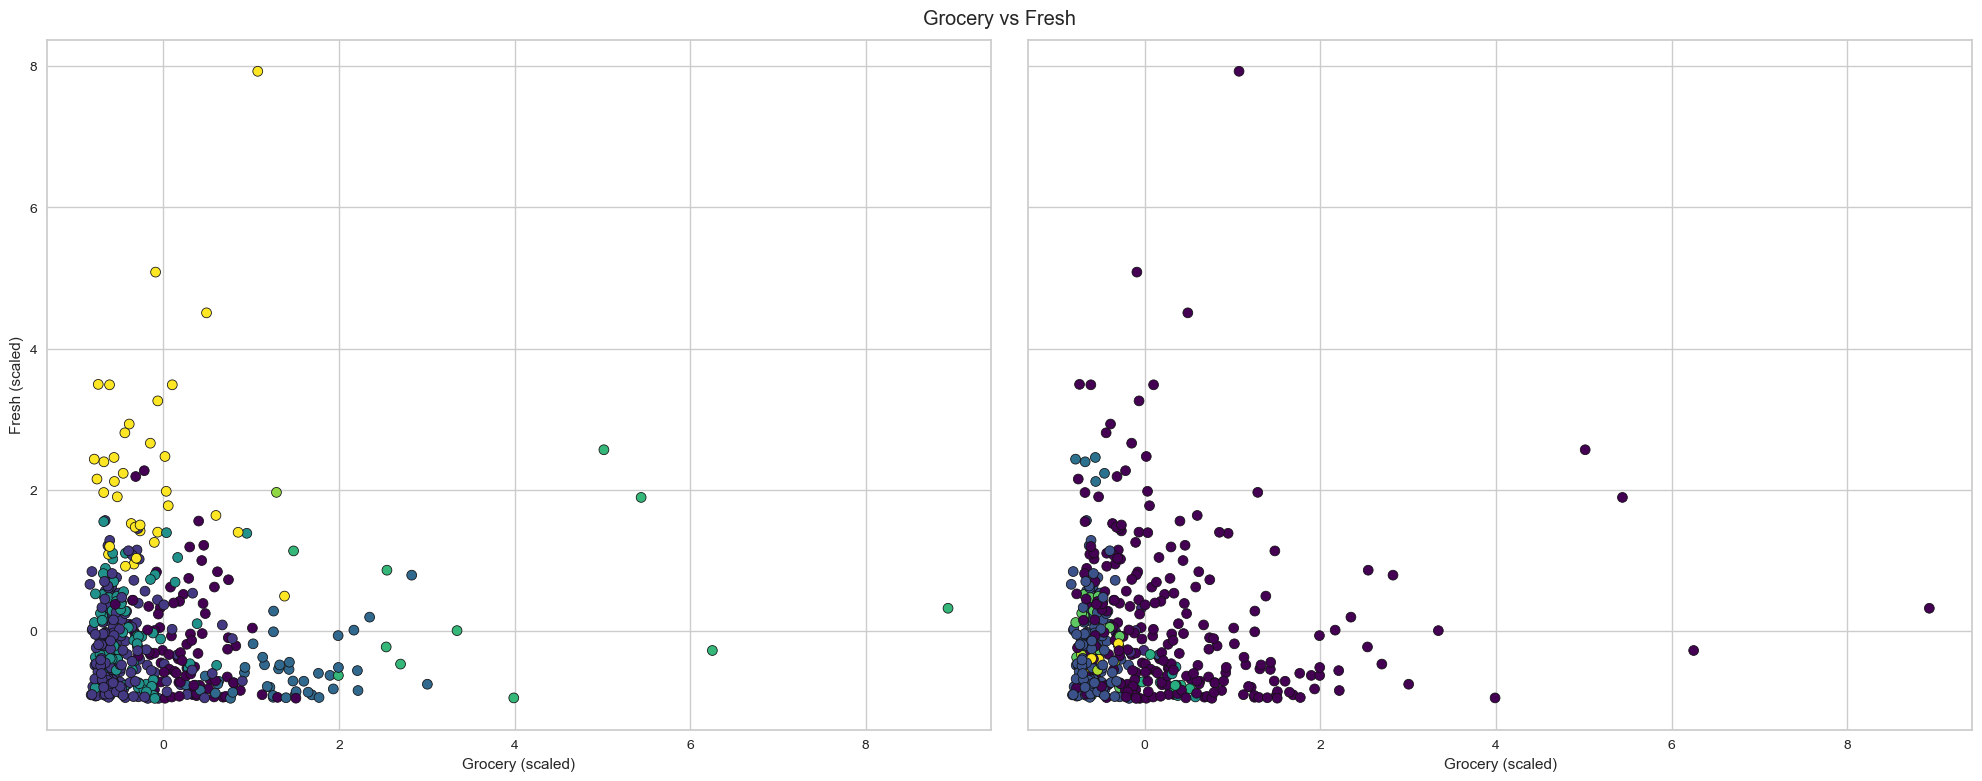

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) #rect=[left, bottom, right, top]
xcol = 'Grocery'
ycol = 'Fresh'
plot(xcol, ycol, labels_7, axs, 0)  # K-Means n-clusters=7
plot(xcol, ycol, clusters, axs, 1)  # DBSCAN
fig.suptitle(xcol + ' vs ' + ycol)
plt.show()

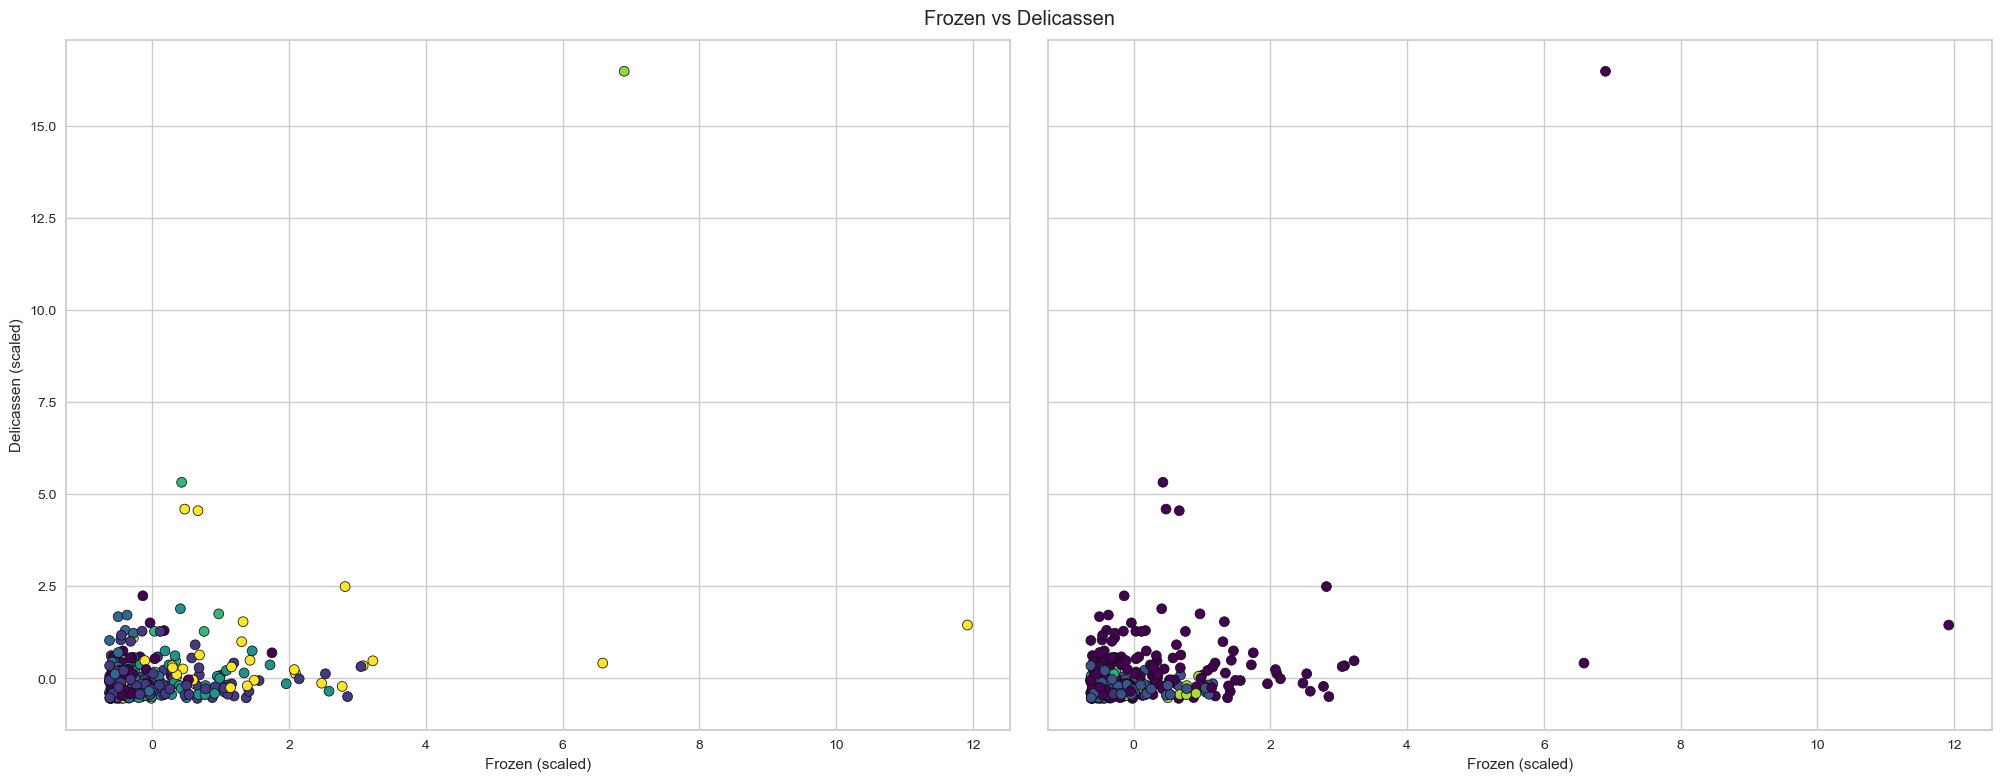

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) #rect=[left, bottom, right, top]
xcol = 'Frozen'
ycol = 'Delicassen'
plot(xcol, ycol, labels_7, axs, 0)  # K-Means n-clusters=7
plot(xcol, ycol, clusters, axs, 1)  # DBSCAN
fig.suptitle(xcol + ' vs ' + ycol)
plt.show()

**OBSERVACIONES:**

* Viendo los gráficos del k-means observo que estableciendo un número mayor de aglomerados consigue agrupar mejor los valores extremos.

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
